In [10]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [11]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
data_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'testing', 'data'))
img_folder = os.path.abspath(os.path.join(os.getcwd(), '..', 'testing', 'samples'))

In [12]:
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_diabetes
import dtreeviz.trees
import IPython.display
from IPython.core.display import display, HTML
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [13]:
def save_viz_locally(viz, change):
    if change is None:
        change = {'None': None}
    image_name = 'colors_{}.svg'.format('_'.join(list(change.keys())))
    filename = os.path.join(img_folder, image_name)
    viz.save(filename)
    filename = os.path.join('..', 'testing', 'samples', image_name)
    return filename

In [14]:
RED = '#ff0000'

In [15]:
#data for classifier
classifier = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()
classifier.fit(iris.data, iris.target)

#date for regressor
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()
regr.fit(boston.data, boston.target)

#data for bivar_3D
df_cars = pd.read_csv(os.path.join(data_folder, 'cars.csv'))
X = df_cars.drop('MPG', axis=1)
y = df_cars['MPG']
features = [2, 1]
X = X.values[:,features]

def change_classifier(colors):
    viz = dtreeviz.trees.dtreeviz(classifier,
                                  iris.data,
                                  iris.target,
                                  target_name='variety',
                                  feature_names=iris.feature_names,
                                  class_names=["setosa", "versicolor", "virginica"],
                                  colors=colors
                                  )

    return viz


def change_regression(colors):
    viz = dtreeviz.trees.dtreeviz(regr,
                                  boston.data,
                                  boston.target,
                                  target_name='price',
                                  feature_names=boston.feature_names,
                                  colors=colors)
    return viz

def change_rtreeviz_bivar_3D(colors):
    figsize = (6,5)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    t = dtreeviz.trees.rtreeviz_bivar_3D(ax,
                                         X, y,
                                         max_depth=4,
                                         feature_names=['Vehicle Weight', 'Horse Power'],
                                         target_name='MPG',
                                         fontsize=14,
                                         elev=20,
                                         azim=25,
                                         dist=8.2,
                                         show={'splits','title'},
                                        colors=colors)
    plt.show()
    


unchanged


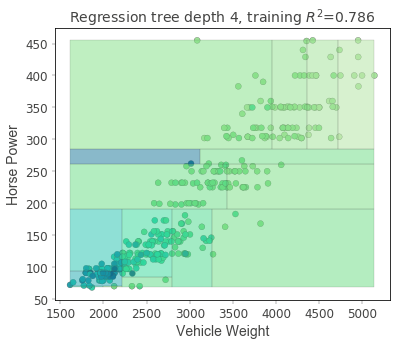

all changes


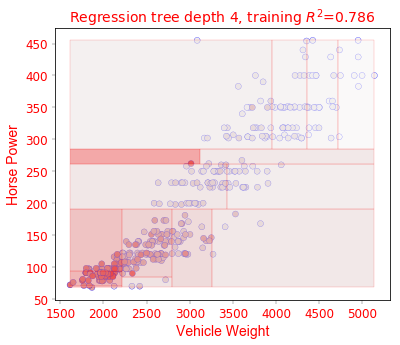

{'tick_label': '#ff0000'}


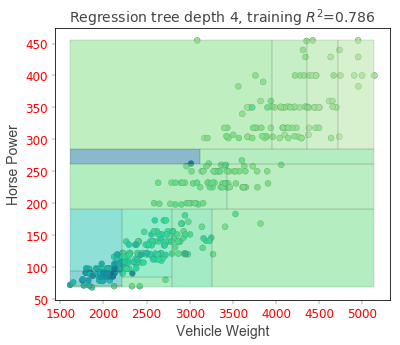

{'title': '#ff0000'}


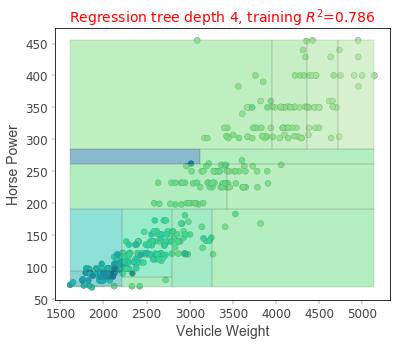

{'axis_label': '#ff0000'}


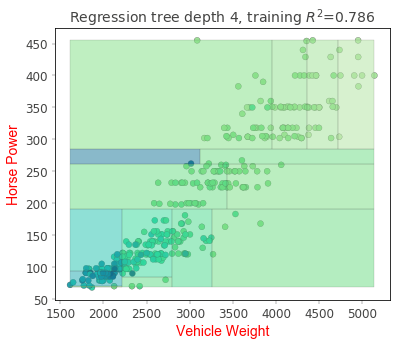

{'color_map_min': '#ffffff'}


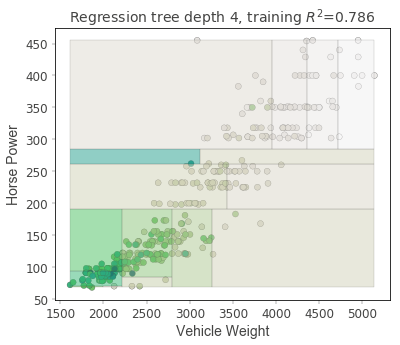

{'color_map_max': '#ff0000'}


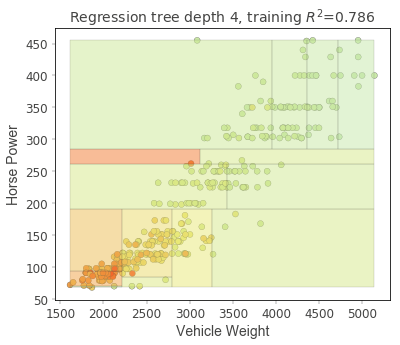

{'edge': '#ff0000'}


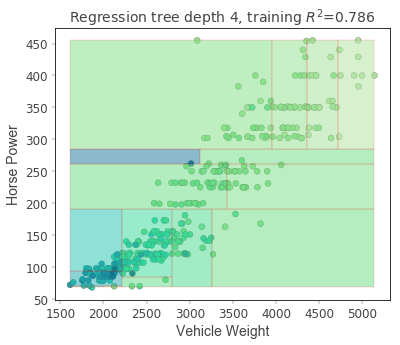

{'scatter_edge': '#0000ff'}


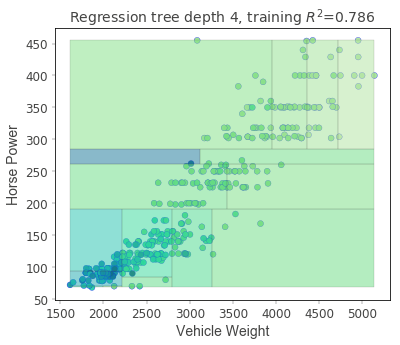

In [16]:
def change_heatmap(colors):
    figsize = (6, 5)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    t = dtreeviz.trees.rtreeviz_bivar_heatmap(ax,
                                              X, y,
                                              max_depth=4,
                                              feature_names=['Vehicle Weight', 'Horse Power'],
                                              fontsize=14,
                                              colors=colors)
    plt.show()
    
changes = [{'tick_label': RED}, {'title': RED}, {'axis_label': RED},
           {'color_map_min': '#ffffff'}, {'color_map_max': RED}, {'edge': RED}, {'scatter_edge': '#0000ff'}]

print('unchanged')
change_heatmap(None)

print('all changes')
change_heatmap({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_heatmap(change)

unchanged


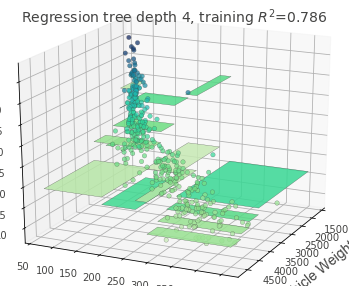

all changes


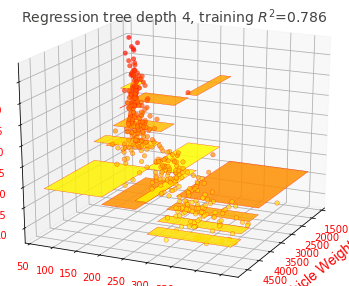

{'scatter_edge': '#ff0000'}


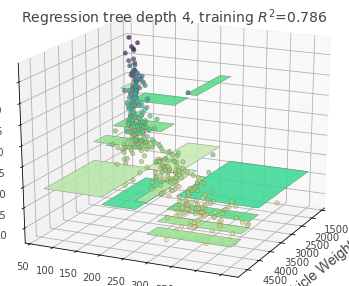

{'tick_label': '#ff0000'}


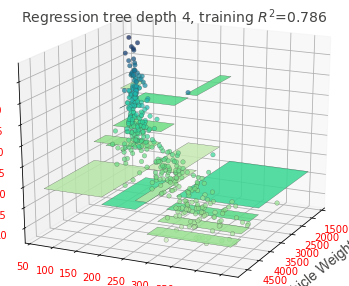

{'axis_label': '#ff0000'}


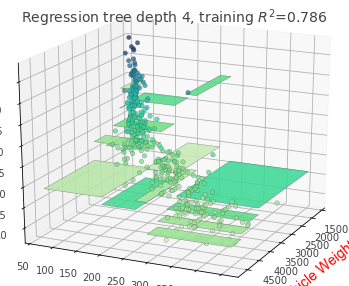

{'edge': '#ff0000'}


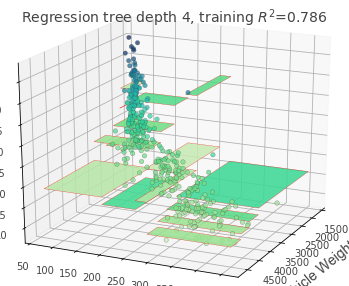

{'color_map_min': '#ff0000'}


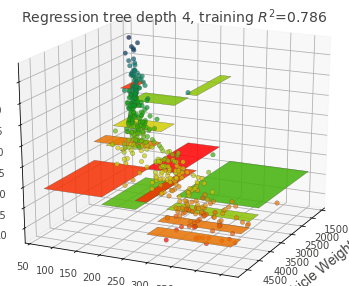

{'color_map_max': '#ff0000'}


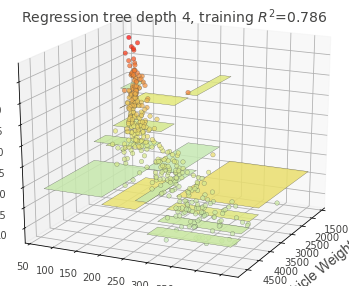

{'color_map_min': '#ffff00', 'color_map_max': '#ff0000'}


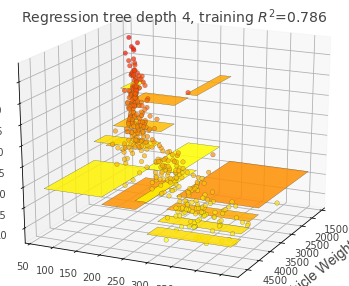

In [17]:
changes = [{'scatter_edge': RED}, {'tick_label': RED}, {'axis_label': '#ff0000'},
           {'edge': '#ff0000'},
           {'color_map_min': RED}, {'color_map_max': RED}, {'color_map_min': '#ffff00', 'color_map_max': RED}]

print('unchanged')
change_rtreeviz_bivar_3D(None)

print('all changes')
change_rtreeviz_bivar_3D({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_rtreeviz_bivar_3D(change)


In [18]:
changes = {'no changes': None,
           'wedge': {'wedge': RED},
           'split line': {'split_line': RED},
           'markers': {'scatter_marker': RED},
           'split_prev': {'scatter_marker': RED},
           'axis_label': {'axis_label': RED},
           'title': {'title': RED},
           'classes': {'classes':  [
                        None, # 0 classes
                        None, # 1 class
                       ["#FEFEBB","#a1dab4"], # 2 classes
                       ["#ff0000","#00ff00",'#0000ff'], # colors were changed here
                       ["#FEFEBB","#D9E6F5",'#a1dab4','#fee090'], # 4
                       ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                       ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                       ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                       ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]},
           'rect_edge': {'rect_edge': RED},
           'text': {'text': RED},
           'text_wedge': {'text_wedge': RED},
           'arrow': {'arrow': '#ff0000'},
           'tick_label': {'tick_label': RED},
           'legend_edge': {'legend_edge': RED},
           'pie': {'pie': RED},
           }

regression_changes = ['no changes', 'wedge', 'split line', 'markers', 'axis_label',
                      'arrow', 'tick_label']
classifier_changes = ['no changes', 'wedge', 'text_wedge', 'classes', 'title', 'text', 
                      'rect_edge', 'pie']

html = []

for f, relevant_changes in zip((change_regression, change_classifier),
                               (regression_changes, classifier_changes)):
    for change in relevant_changes:
        viz = f(changes[change])
        filename = save_viz_locally(viz, changes[change]).replace('\\', '/')
        html.append(f'<div>{change}<img src="{filename}?sanitize=True)"/></div>')
        
IPython.display.HTML('<hr>'.join(html))

In [19]:
X_train, y_train = df_cars.drop('MPG', axis=1), df_cars['MPG']

def change_rtree(colors):
    fig = plt.figure()
    ax = fig.gca()
    t = dtreeviz.trees.rtreeviz_univar(ax,
                                       X_train.WGT, y_train,
                                       max_depth=2,
                                       feature_name='Vehicle Weight',
                                       target_name='MPG',
                                       fontsize=14,
                                       colors=colors)
    plt.show()

No changes


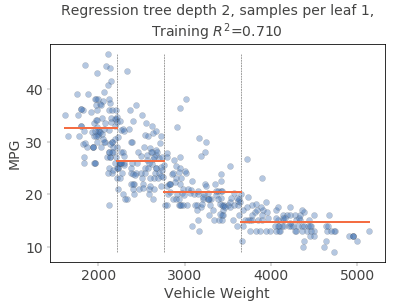

all changes


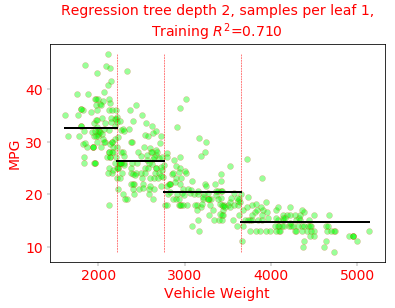

scatter_marker #00ff00


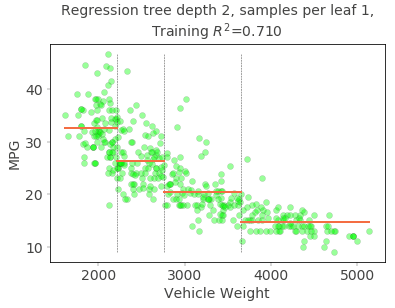

scatter_edge #ff0000


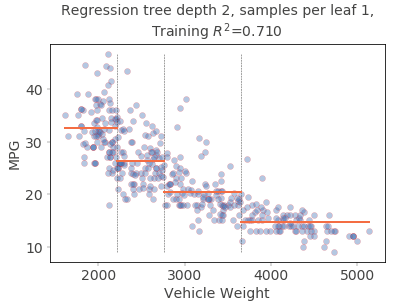

mean_line #000000


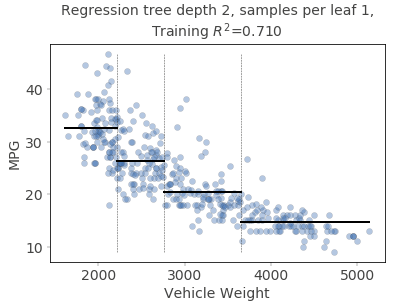

split_line #ff0000


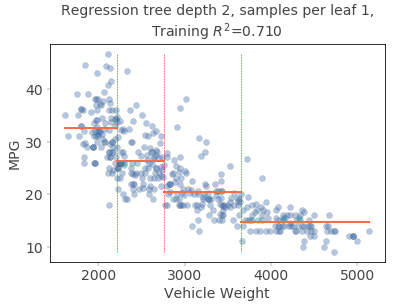

axis_title #ff0000


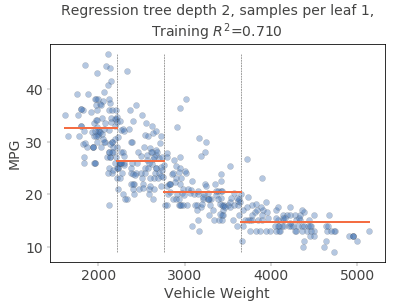

tick_label #ff0000


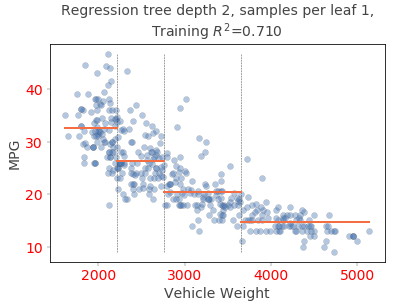

axis_label #ff0000


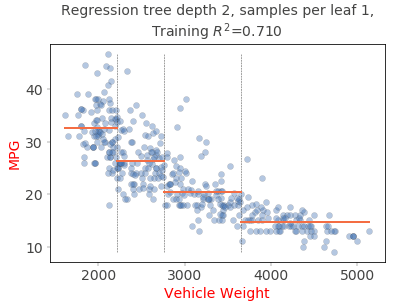

title #ff0000


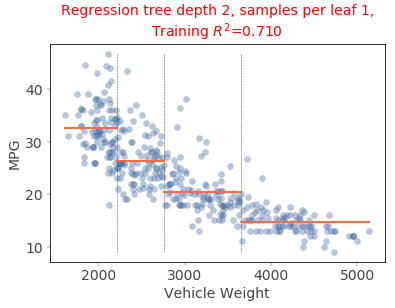

In [20]:
changes = {'scatter_marker': '#00ff00', 'scatter_edge': '#ff0000', 'mean_line': '#000000',
           'split_line': '#ff0000', 'axis_title': '#ff0000', 'tick_label': '#ff0000', 'axis_label': '#ff0000',
           'title': '#ff0000'}

print('No changes')
change_rtree(None)
print('all changes')
change_rtree(changes)
for k, v in changes.items():
    print(k, v)
    change_rtree({k: v})

no changes


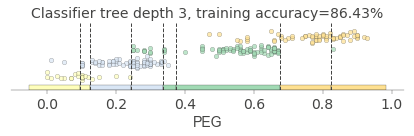

all changes


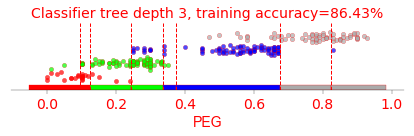

{'title': '#ff0000'}


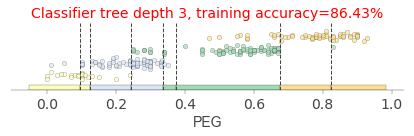

{'axis_label': '#ff0000'}


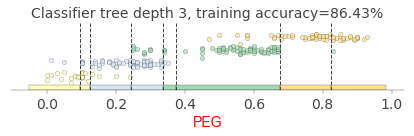

{'tick_label': '#ff0000'}


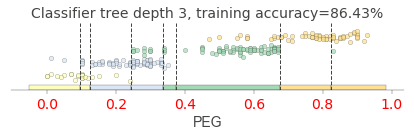

{'edge': '#ff0000'}


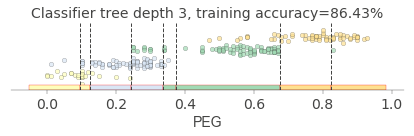

{'scatter_edge': '#ff0000'}


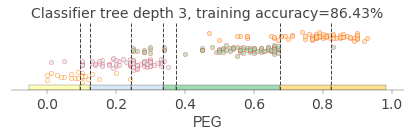

{'split_line': '#ff0000'}


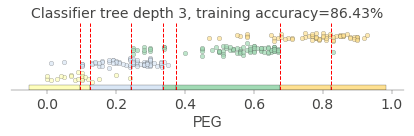

{'classes': [None, None, ['#FEFEBB', '#a1dab4'], ['#FEFEBB', '#D9E6F5', '#a1dab4'], ['#ff0000', '#00ff00', '#0000ff', '#aaaaaa'], ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', '#fee090'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', '#fee090', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43', '#d73027']]}


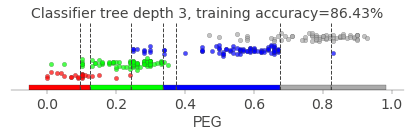

In [21]:
know = pd.read_csv(os.path.join(data_folder, 'knowledge.csv'))
class_names = ['very_low', 'Low', 'Middle', 'High']
know['UNS'] = know['UNS'].map({n: i for i, n in enumerate(class_names)})

x_train = know.PEG
y_train = know['UNS']

def change_ctreeviz_univar(colors):
    figsize = (6,2)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ct = dtreeviz.trees.ctreeviz_univar(ax, x_train, y_train, max_depth=3,
                                        feature_name = 'PEG', class_names=class_names,
                                        target_name='Knowledge',
                                        nbins=40, gtype='strip',
                                        show={'splits','title'},
                                        colors=colors)
    plt.tight_layout()
    plt.show()

print('no changes')
change_ctreeviz_univar(None)

changes = [{'title': RED}, {'axis_label': RED}, {'tick_label': RED}, {'edge': RED},
           {'scatter_edge': RED}, {'split_line': RED},
           {'classes':  [None, # 0 classes
                         None, # 1 class
                         ["#FEFEBB","#a1dab4"], # 2 classes
                         ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
                         ["#ff0000","#00ff00",'#0000ff', '#aaaaaa'], # colors were changed here                   
                         ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                         ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                         ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]}
          ]

print('all changes')
change_ctreeviz_univar({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_ctreeviz_univar(change)

In [22]:
features=[4,3]
X_train = know.drop('UNS', axis=1)
y_train = know['UNS']
X_train = X_train.values[:, features]

def change_ctreeviz_bivar(colors):
    figsize = (6,5)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    dtreeviz.trees.ctreeviz_bivar(ax, X_train, y_train, max_depth=3,
                                  feature_names = ['PEG','LPR'],
                                  class_names=class_names,
                                  target_name='Knowledge',
                                  colors=colors)
    plt.tight_layout()
    plt.show()

no changes


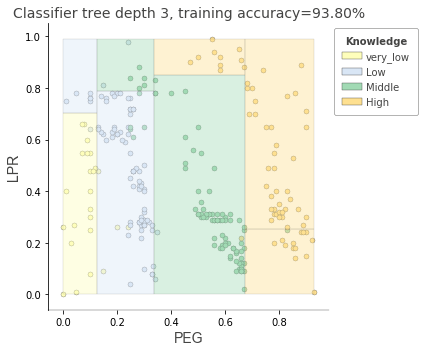

all changes


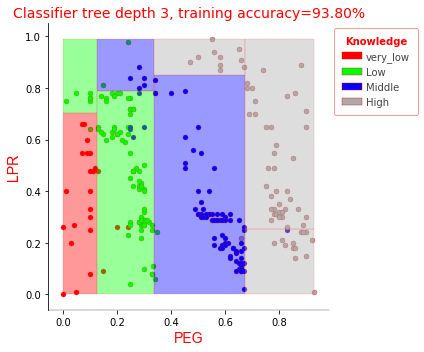

{'title': '#ff0000'}


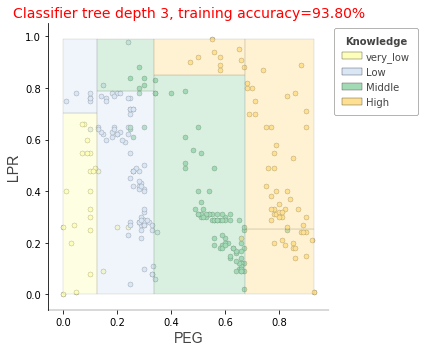

{'axis_label': '#ff0000'}


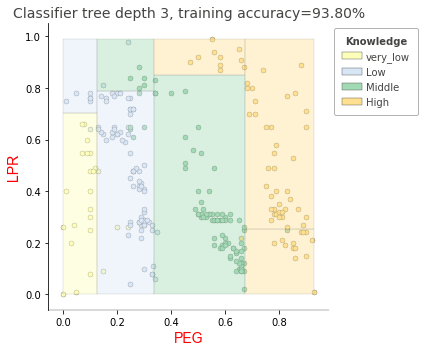

{'tick_label': '#ff0000'}


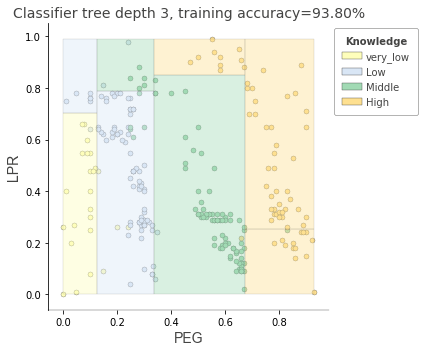

{'rect_edge': '#ff0000'}


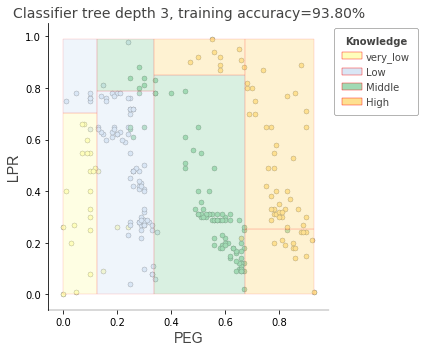

{'legend_edge': 'RED'}


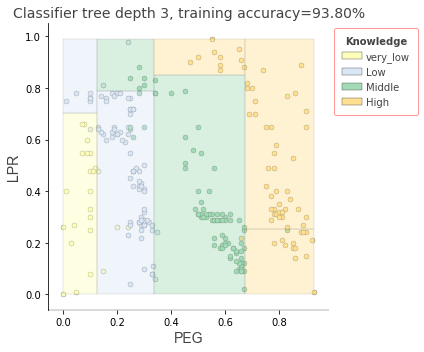

{'legend_title': 'RED'}


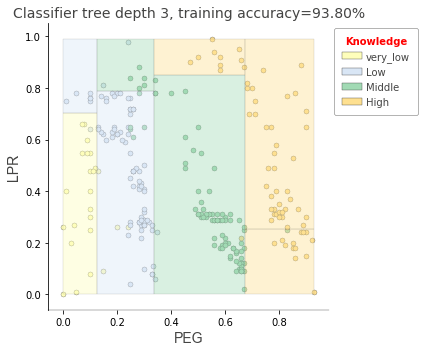

{'scatter_edge': '#ff0000'}


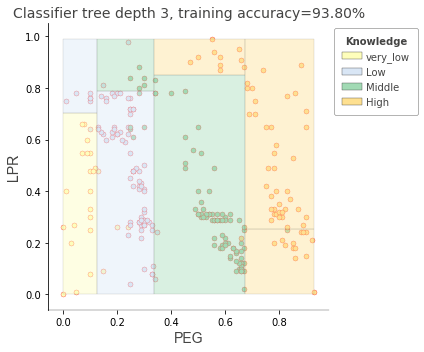

{'classes': [None, None, ['#FEFEBB', '#a1dab4'], ['#FEFEBB', '#D9E6F5', '#a1dab4'], ['#ff0000', '#00ff00', '#0000ff', '#aaaaaa'], ['#FEFEBB', '#D9E6F5', '#a1dab4', '#41b6c4', '#fee090'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#2c7fb8', '#fee090', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#7fcdbb', '#41b6c4', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#edf8b1', '#c7e9b4', '#7fcdbb', '#1d91c0', '#225ea8', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43'], ['#FEFEBB', '#c7e9b4', '#41b6c4', '#74add1', '#4575b4', '#313695', '#fee090', '#fdae61', '#f46d43', '#d73027']]}


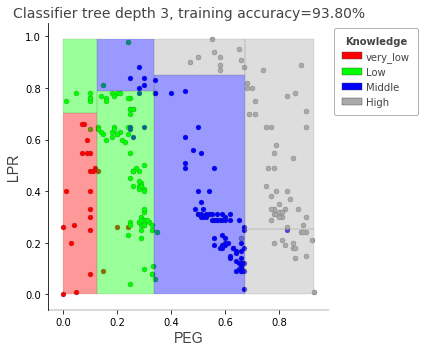

In [23]:
changes = [{'title': RED}, {'axis_label': RED}, {'tick_label': RED}, {'rect_edge': RED},
           {'legend_edge': 'RED'}, {'legend_title': 'RED'},
           {'scatter_edge': RED}, 
           {'classes':  [None, # 0 classes
                         None, # 1 class
                         ["#FEFEBB","#a1dab4"], # 2 classes
                         ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
                         ["#ff0000","#00ff00",'#0000ff', '#aaaaaa'], # colors were changed here                   
                         ["#FEFEBB","#D9E6F5",'#a1dab4','#41b6c4','#fee090'], # 5
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#2c7fb8','#fee090','#f46d43'], # 6
                         ["#FEFEBB",'#c7e9b4','#7fcdbb','#41b6c4','#225ea8','#fdae61','#f46d43'], # 7
                         ["#FEFEBB",'#edf8b1','#c7e9b4','#7fcdbb','#1d91c0','#225ea8','#fdae61','#f46d43'], # 8
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43'], # 9
                         ["#FEFEBB",'#c7e9b4','#41b6c4','#74add1','#4575b4','#313695','#fee090','#fdae61','#f46d43','#d73027'] # 10
                   ]}
          ]

print('no changes')
change_ctreeviz_bivar(None)

print('all changes')
change_ctreeviz_bivar({k: v for d in changes for k, v in d.items()})

for change in changes:
    print(change)
    change_ctreeviz_bivar(change)

In [24]:
regr = tree.DecisionTreeRegressor(max_depth=2)  # limit depth of tree
diabetes = load_diabetes()
regr.fit(diabetes.data, diabetes.target)
X = diabetes.data[np.random.randint(0, len(diabetes.data)),:]  # random sample from training

def change_dtreeviz(colors):
    return dtreeviz.trees.dtreeviz(regr,
                                   diabetes.data, 
                                   diabetes.target, 
                                   target_name='value', 
                                   orientation ='LR',  # left-right orientation
                                   feature_names=diabetes.feature_names,
                                   X=X,  # need to give single observation for prediction
                                   colors=colors)           


In [25]:
html = []
changes = [None, {'highlight': RED}, 
           {'text': RED}, 
           {'leaf_label': RED}, 
           {'arrow': RED}]

for change in changes:
    viz = change_dtreeviz(change)
    filename = save_viz_locally(viz, change).replace('\\', '/')
    html.append(f'<div>{change}<img src="{filename}?sanitize=True"></img></div>')

display(HTML('<hr>'.join(html)))